In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('transaction_data.csv')

In [4]:
data.shape

(5315, 3)

In [5]:
data.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
data.describe()

date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:35:03  Masha_Ozerova  successfull
freq                      6            112         3692

In [7]:
data.head()

date                name  transaction
0  2020-03-02 00:37:20   Ekaterina_Petrova    cancelled
1  2020-03-02 00:59:09      Irina_Fedorova  successfull
2  2020-03-02 01:06:14  Ekaterina_Smirnova  successfull
3  2020-03-02 00:02:58    Lolita_Polyanova    cancelled
4  2020-03-02 00:17:52      Julia_Smirnova    cancelled

In [11]:
######################################################################################################################

In [12]:
# Узнать количество пропущенных значений

In [10]:
data.isna().value_counts(['date', 'name', 'transaction'])

date   name   transaction
False  False  False          5315
dtype: int64

In [13]:
######################################################################################################################

In [14]:
# Анализ transaction

In [23]:
transaction = data.transaction.value_counts().reset_index()
transaction

index  transaction
0  successfull         3692
1    cancelled         1619
2        error            4

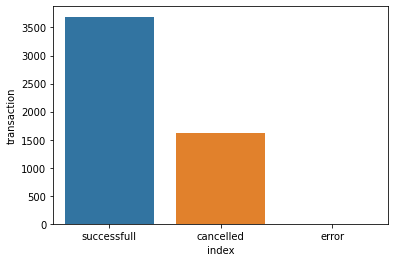

In [22]:
sns.barplot(x='index', y='transaction', data=transaction)

In [25]:
######################################################################################################################

In [24]:
# Cколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
# Посмотрите на характеристики распределения
# Затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где
# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций

In [37]:
data_success = data.loc[data.transaction == 'successfull'] \
.groupby('name', as_index=False).agg({'transaction': 'count'}) \
.sort_values('transaction', ascending=False)
data_success.head()

name  transaction
48   Svetlana_Smirnova           82
41       Olga_Smirnova           80
31       Masha_Ozerova           80
43    Svetlana_Ivanova           79
47  Svetlana_Polyanova           78

In [41]:
data_success.transaction.mean()

65.92857142857143

In [39]:
data_success.transaction.median()

64.0

In [40]:
data_success.transaction.quantile(q=0.25)

61.0

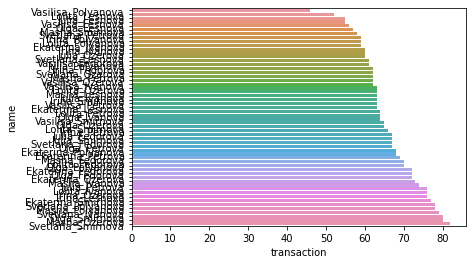

In [35]:
sns.barplot(x='transaction', y='name', data=data_success)

In [42]:
######################################################################################################################

In [43]:
# К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:
# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций
# Пропущенные значения заполните нулями.

# Note: фильтровать успешные транзакции не нужно - постройте табличку по всем
# Новые данные сохранены в df. 

In [111]:
df = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])

In [65]:
df.head()

date                name  transaction  minute
0 2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37
1 2020-03-02 00:59:09      Irina_Fedorova  successfull      59
2 2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6
3 2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2
4 2020-03-02 00:17:52      Julia_Smirnova    cancelled      17

In [66]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [46]:
df.shape

(5315, 4)

In [47]:
df.describe()

minute
count  5315.000000
mean     24.622389
std      16.649462
min       0.000000
25%      11.000000
50%      22.000000
75%      37.000000
max      59.000000

In [49]:
df.isna().value_counts()

date   name   transaction  minute
False  False  False        False     5315
dtype: int64

In [113]:
df.pivot_table('transaction', index='minute', columns='name', aggfunc='count').fillna(0).head()

name    Ekaterina_Fedorova  Ekaterina_Ivanova  Ekaterina_Lesnova  \
minute                                                             
0                      3.0                4.0                2.0   
1                      4.0                4.0                0.0   
2                      1.0                2.0                4.0   
3                      3.0                0.0                2.0   
4                      3.0                0.0                0.0   

name    Ekaterina_Ozerova  Ekaterina_Petrova  Ekaterina_Polyanova  \
minute                                                              
0                     3.0                4.0                  4.0   
1                     4.0                2.0                  5.0   
2                     4.0                2.0                  1.0   
3                     0.0                5.0                  2.0   
4                     3.0                1.0                  1.0   

name    Ekaterina_Smirnova  Irina_Fedorova  Irina_Ivanova  Irina_Lesnova  ...  \
minute                                                                    ...   
0                      2.0             1.0            2.0            2.0  ...   
1                      4.0             4.0            4.0            3.0  ...   
2                      3.0             2.0            3.0            3.0  ...   
3                      1.0             3.0            2.0            2.0  ...   
4                      2.0             3.0            2.0            1.0  ...   

name    Svetlana_Petrova  Svetlana_Polyanova  Svetlana_Smirnova  \
minute                                                            
0                    0.0                 3.0                1.0   
1                    4.0                 5.0                3.0   
2                    4.0                 1.0                3.0   
3                    1.0                 5.0                5.0   
4                    1.0                 2.0                2.0   

name    Vasilisa_Fedorova  Vasilisa_Ivanova  Vasilisa_Lesnova  \
minute                                                          
0                     1.0               4.0               1.0   
1                     2.0               3.0               3.0   
2                     3.0               0.0               1.0   
3                     2.0               4.0               0.0   
4                     1.0               1.0               2.0   

name    Vasilisa_Ozerova  Vasilisa_Petrova  Vasilisa_Polyanova  \
minute                                                           
0                    3.0               0.0                 0.0   
1                    0.0               0.0                 3.0   
2                    2.0               1.0                 3.0   
3                    3.0               4.0                 1.0   
4                    2.0               3.0                 0.0   

name    Vasilisa_Smirnova  
minute                     
0                     1.0  
1                     2.0  
2                     1.0  
3                     0.0  
4                     1.0  

[5 rows x 56 columns]

In [69]:
######################################################################################################################

In [68]:
# Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. 
# Результат сохраните в колонку true_minute
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).
# Данные записаны в df , колонка date прочитана как дата.


In [114]:
df['true_minute'] = df.date.dt.hour * 60 + df.date.dt.minute

In [101]:
df

date                name  transaction  minute  true_minute
0    2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37           37
1    2020-03-02 00:59:09      Irina_Fedorova  successfull      59           59
2    2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6           66
3    2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2            2
4    2020-03-02 00:17:52      Julia_Smirnova    cancelled      17           17
...                  ...                 ...          ...     ...          ...
5310 2020-03-02 00:09:28   Vasilisa_Fedorova  successfull       9            9
5311 2020-03-02 00:46:31    Vasilisa_Ozerova  successfull      46           46
5312 2020-03-02 00:16:38      Olga_Polyanova  successfull      16           16
5313 2020-03-02 00:13:00  Ekaterina_Smirnova  successfull      13           13
5314 2020-03-02 01:15:45      Irina_Fedorova    cancelled      15           75

[5315 rows x 5 columns]

In [122]:
df_true_count_transaction = df.groupby('true_minute', as_index=False).agg({'transaction': 'count'}) \
.sort_values('transaction', ascending=False)

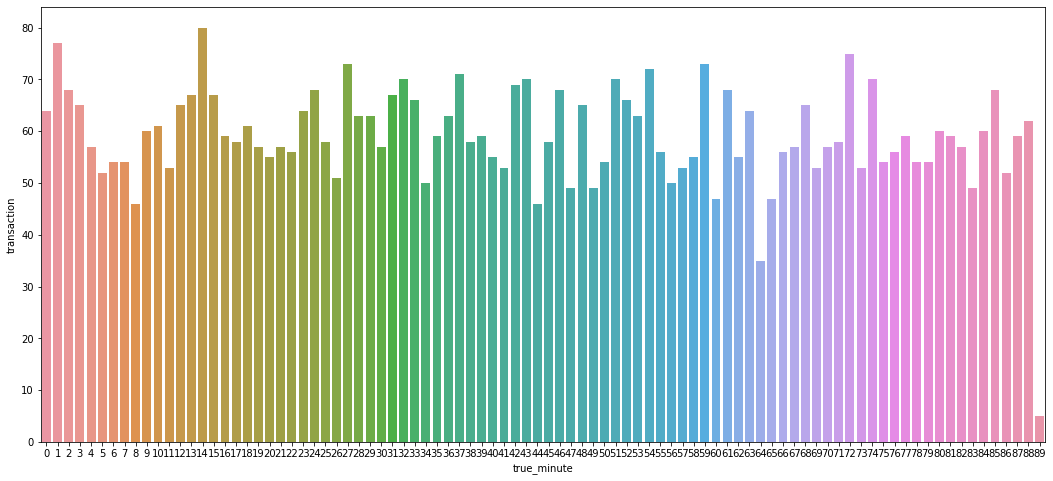

In [127]:
plt.figure(figsize=(18, 8))
sns.barplot(x='true_minute', y='transaction', data=df_true_count_transaction)